# Data Understanding

In [32]:
# Import Library sesuai kebutuhan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Memuat Dataset

df = pd.read_csv("data/HousePriceTrain.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preparation

In [35]:
# Data Preparation (Memeriksa ada nilai dalam dataset yang "kosong" atau "NaN")
print(df.isnull().values.any())

True


In [36]:
# Jika ingin memeriksa data isnull perkolom
print(df.isnull().sum())
# df.isnull().sum

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [37]:
# Mengisi Nilai yang Hilang (Missing Values)
df = df.fillna(df.mean(numeric_only=True))
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [38]:
# Memilih Fitur (Feature) dan target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

X = df[features]
y = df['SalePrice']

In [39]:
# Diskritasi target menjadi beberapa kelas
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).flatten()
print("Data target setelah diskritisasi: ")

# untuk mengetahui nilai nilai unique hasil diskrit
unique_values = set(y_binned)
print("Nilai unik dari y_binned: ", unique_values)

# untuk mengetahui nilai detail hasil diskrit
for bin_idx in range(4):
    bin_mask = (y_binned == bin_idx)
    print(f"Bin {bin_idx}: {y[bin_mask]}")

Data target setelah diskritisasi: 
Nilai unik dari y_binned:  {0.0, 1.0, 2.0, 3.0}
Bin 0: 8       129900
9       118000
10      129500
17       90000
23      129900
         ...  
1443    121000
1445    129000
1448    112000
1449     92000
1453     84500
Name: SalePrice, Length: 365, dtype: int64
Bin 1: 3       140000
5       143000
12      144000
14      157000
15      132000
         ...  
1446    157900
1450    136000
1452    145000
1458    142125
1459    147500
Name: SalePrice, Length: 363, dtype: int64
Bin 2: 0       208500
1       181500
7       200000
28      207500
32      179900
         ...  
1440    191000
1444    179600
1454    185000
1455    175000
1456    210000
Name: SalePrice, Length: 365, dtype: int64
Bin 3: 2       223500
4       250000
6       307000
11      345000
13      279500
         ...  
1437    394617
1442    310000
1447    240000
1451    287090
1457    266500
Name: SalePrice, Length: 367, dtype: int64


In [40]:
# Membagi dataset menjadi pelatihan dan pengujian
# data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1168, 7)
Shape of X_test:  (292, 7)
Shape of y_train:  (1168,)
Shape of y_test:  (292,)


# Modeling

In [41]:
# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Buat prediksi menggunakan data uji
y_pred = model.predict(X_test)

In [42]:
# # KODE SPADA

# # Evaluasi Model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# labels = ['Low', 'Medium', 'High', 'Very High']

# # Meenghitung Akurasi Baseline
# baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
# print("Baseline Accuracy: ", baseline_accuracy, "\n")
# print("Desicion Tree Accuracy: ", accuracy)
# print("Desicion Tree Presicion: ", precision, "\n")

# # Tampilkan confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("confusion_matrix: ")
# print(conf_matrix)

# PENJELASAN KESALAHAN: 
# y_pred_baseline belum didefinisikan


# KODE GPT

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
labels = ['Low', 'Medium', 'High', 'Very High']

# Menghitung Akurasi Baseline (asumsi prediksi baseline adalah kelas mayoritas)
# Prediksi baseline: memprediksi semua sampel sebagai kelas mayoritas

# Konversi y_test ke tipe integer jika diperlukan
y_test_int = y_test.astype(int)

# Hitung kelas mayoritas
majority_class = np.argmax(np.bincount(y_test_int))

# Buat prediksi baseline dengan kelas mayoritas
y_pred_baseline = np.full_like(y_test_int, fill_value=majority_class)

# Hitung baseline accuracy
baseline_accuracy = accuracy_score(y_test_int, y_pred_baseline)
print("Baseline Accuracy: ", baseline_accuracy, "\n")
print("Decision Tree Accuracy: ", accuracy)
print("Decision Tree Precision: ", precision, "\n")

# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)



Baseline Accuracy:  0.2773972602739726 

Decision Tree Accuracy:  0.6541095890410958
Decision Tree Precision:  0.654596985539829 

Confusion Matrix: 
[[56 22  3  0]
 [26 35 18  1]
 [ 2  7 43  9]
 [ 0  1 12 57]]


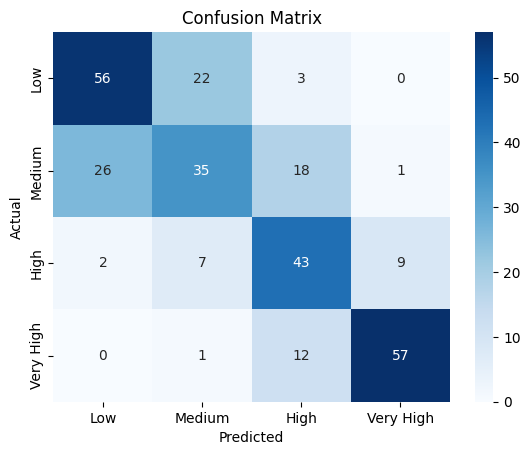

              precision    recall  f1-score   support

         Low       0.67      0.69      0.68        81
      Medium       0.54      0.44      0.48        80
        High       0.57      0.70      0.63        61
   Very High       0.85      0.81      0.83        70

    accuracy                           0.65       292
   macro avg       0.66      0.66      0.66       292
weighted avg       0.65      0.65      0.65       292



In [43]:
# Evaluasi Model - Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan Classification Report
print(classification_report(y_test, y_pred, target_names=labels))